# EDA

## 1. Setup

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

%matplotlib inline
plt.style.use('ggplot')

## 2. Data

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_sub = pd.read_csv("../data/sample_submission.csv")

In [3]:
df_train.shape, df_test.shape, df_sub.shape

((58645, 13), (39098, 12), (39098, 2))

In [4]:
df_train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


## 3. Helper Functions

In [112]:
def plot_hist(df:pd.DataFrame, col:str, bins=50, title=""):
    plt.figure(figsize=(12,6))
    sns.histplot(df[col], bins=bins)
    plt.title(title)
    return plt.show();

def plot_box(df:pd.DataFrame, col:str, hue:str, title=""):
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, y=col, hue=hue)
    plt.title(title)
    return plt.show();

def num_stat_summary(df:pd.DataFrame, col:str):
    return df[col].describe(percentiles=[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1.0])

def plot_categorical_feature(df, feature):
    """
    Plot bar chart and countplot for a categorical feature.
    """
    # Bar Plot for Category Frequency (sorted by count)
    category_counts = df[feature].value_counts().sort_values(ascending=False)
    category_counts_perc = df[feature].value_counts(normalize=True).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(y=category_counts_perc.values, x=category_counts_perc.index)
    plt.title(f'Bar Plot for {feature} Categories %')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(y=category_counts.values, x=category_counts.index)
    plt.title(f'Bar Plot for {feature} Categories')
    plt.ylabel('Count')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()

def plot_categorical_feature_with_target(df, categorical_feature, target_feature):
    """
    Plot bar plot and stacked count plot for a categorical feature grouped by the target feature.
    """
    # Bar Plot: Frequency of Categories within Target Groups
    plt.figure(figsize=(10, 6))
    sns.countplot(x=categorical_feature, hue=target_feature, data=df, palette='Set1')
    plt.title(f'Count Plot of {categorical_feature} by {target_feature}')
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Percentage Stacked Bar Plot
    grouped = df.groupby([target_feature, categorical_feature]).size().unstack(fill_value=0)
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0)
    
    grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')
    plt.title(f'Stacked Percentage Bar Plot of {categorical_feature} by {target_feature}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

def plot_numerical_vs_numerical(df, feature1, feature2):
    """
    Plot a scatter plot, hexbin plot, and correlation between two numerical features.
    """
    # Scatter Plot with Regression Line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=feature1, y=feature2, data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    plt.title(f'Scatter Plot with Regression Line: {feature1} vs {feature2}')
    plt.show()

    # Correlation Heatmap
    corr_value = df[[feature1, feature2]].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_value, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Heatmap: {feature1} vs {feature2}')
    plt.show()

def plot_numerical_vs_categorical(df, numerical_feature, categorical_feature):
    """
    Plot boxplot, violin plot, bar plot, and swarm plot for numerical vs categorical feature.
    """
    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=categorical_feature, y=numerical_feature, data=df)
    plt.title(f'Box Plot of {numerical_feature} by {categorical_feature}')
    plt.xticks(rotation=45)
    plt.show()

    # Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=categorical_feature, y=numerical_feature, data=df)
    plt.title(f'Violin Plot of {numerical_feature} by {categorical_feature}')
    plt.xticks(rotation=45)
    plt.show()

    # Bar Plot with Mean Aggregation
    plt.figure(figsize=(10, 6))
    sns.barplot(x=categorical_feature, y=numerical_feature, data=df, estimator=np.mean, errorbar='sd')
    plt.title(f'Mean of {numerical_feature} by {categorical_feature}')
    plt.xticks(rotation=45)
    plt.show()

## 4. Profile Report

In [9]:
profile = ProfileReport(df_train, title="Training Set Profile Report ")
profile.to_file("training_profile_report.html")

Export report to file: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 128.42it/s]


## 5. EDA

In [104]:
NUM_COLS = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
CAT_COLS = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']

In [107]:
len(NUM_COLS) + len(CAT_COLS)

12

### 5.1 Numerical Columns Univariate Analysis

****************************************************************************************************
		person_age
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


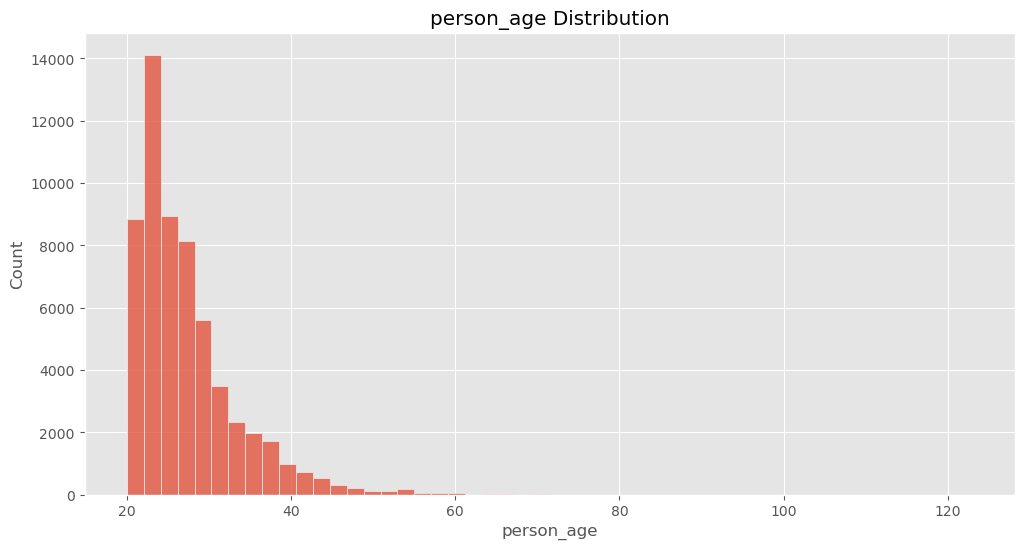

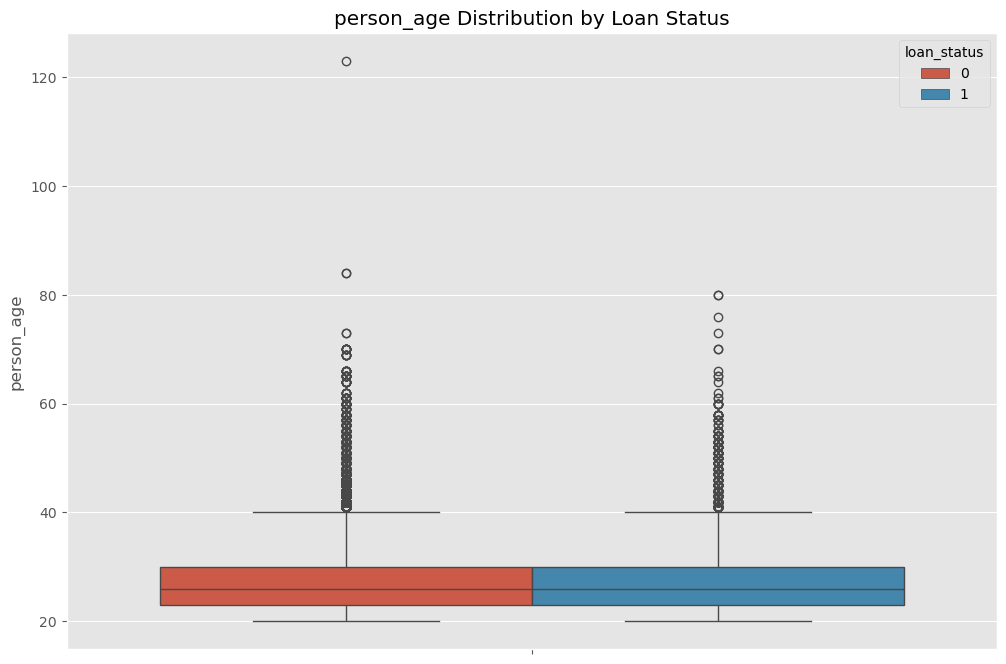

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean        27.550857
std          6.033216
min         20.000000
10%         22.000000
25%         23.000000
50%         26.000000
75%         30.000000
90%         36.000000
95%         39.000000
99%         49.000000
100%       123.000000
max        123.000000
Name: person_age, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


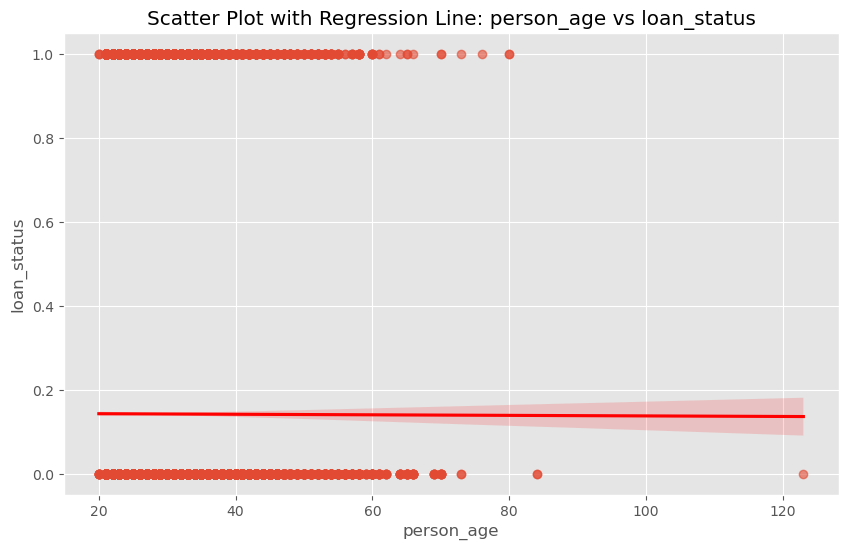

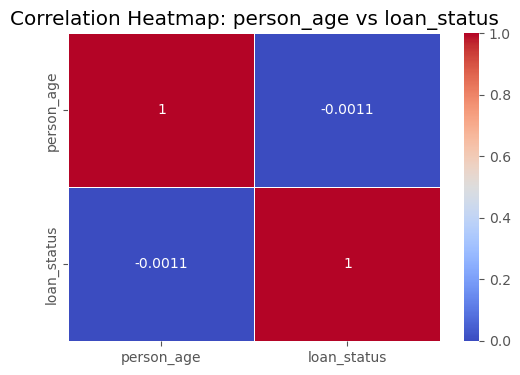





****************************************************************************************************
		person_income
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


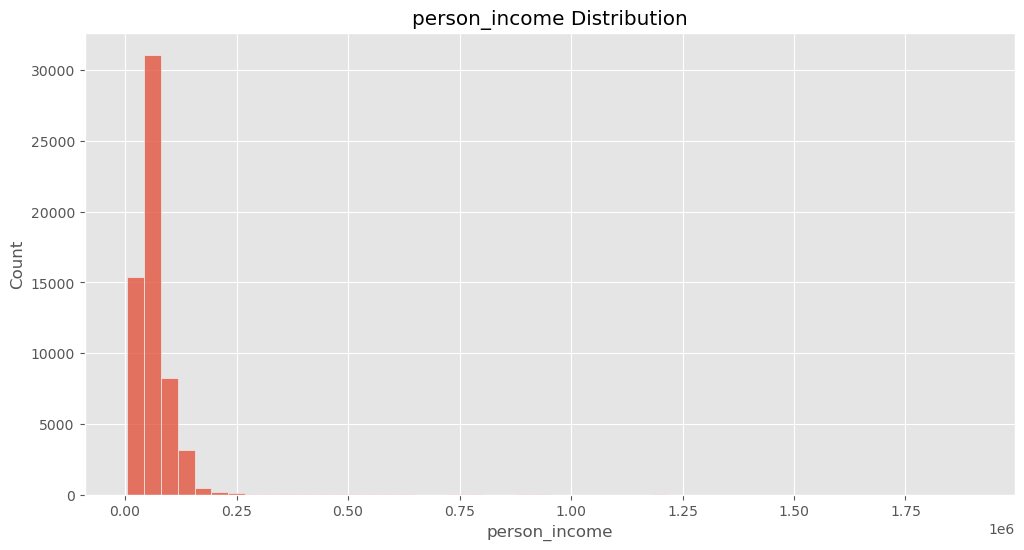

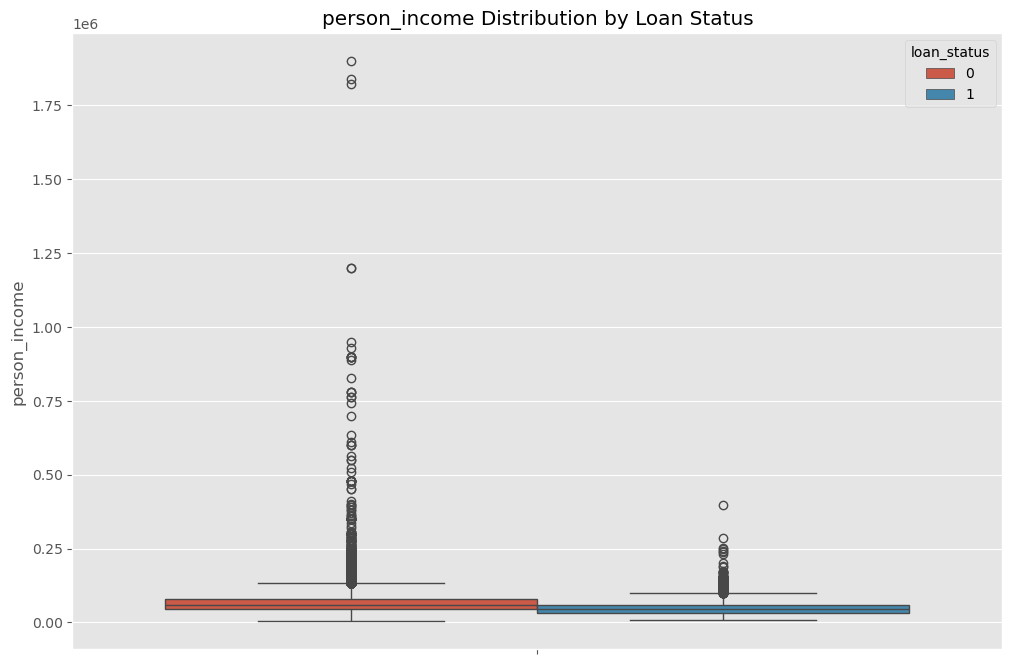

-------------------------------------------------- 
Extremes --------------------------------------------------
count    5.864500e+04
mean     6.404617e+04
std      3.793111e+04
min      4.200000e+03
10%      3.120000e+04
25%      4.200000e+04
50%      5.800000e+04
75%      7.560000e+04
90%      1.000000e+05
95%      1.200000e+05
99%      1.750000e+05
100%     1.900000e+06
max      1.900000e+06
Name: person_income, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


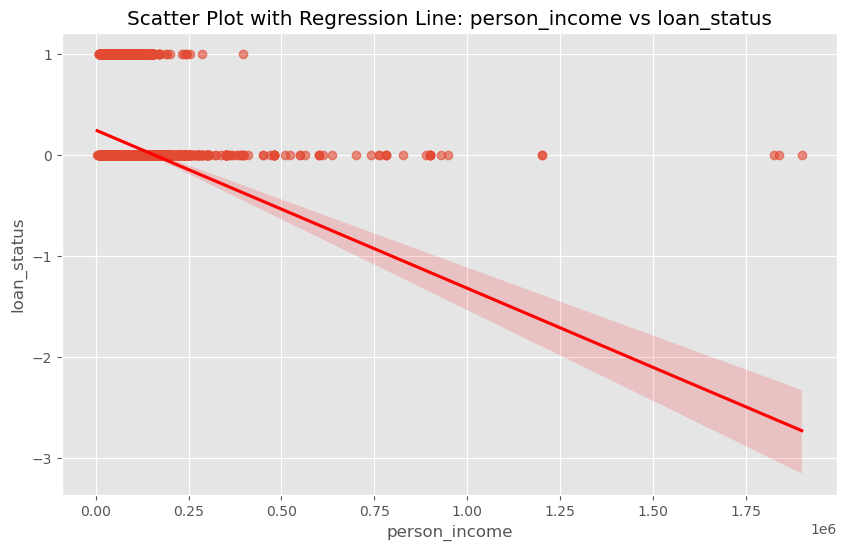

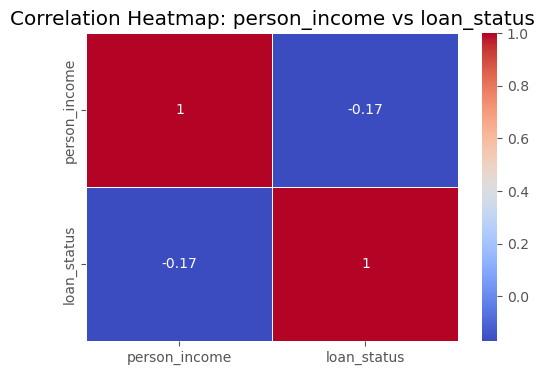





****************************************************************************************************
		person_emp_length
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


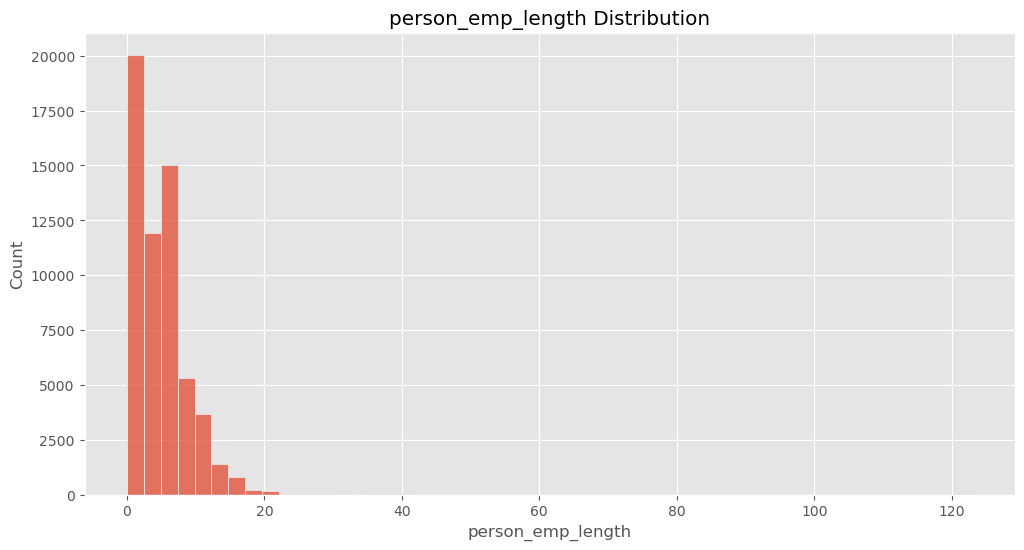

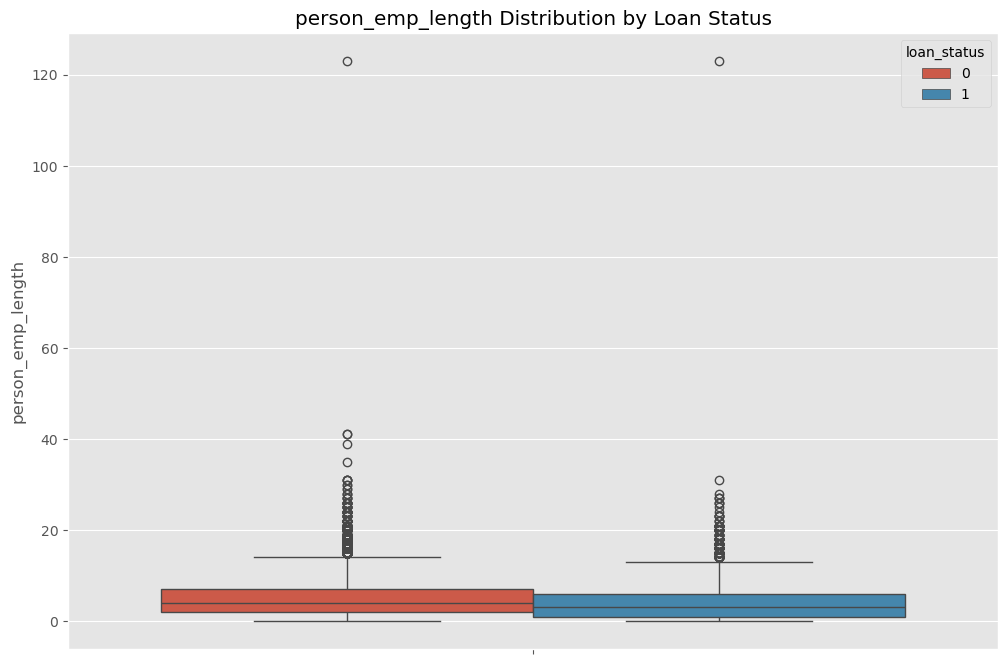

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean         4.701015
std          3.959784
min          0.000000
10%          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
90%         10.000000
95%         12.000000
99%         17.000000
100%       123.000000
max        123.000000
Name: person_emp_length, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


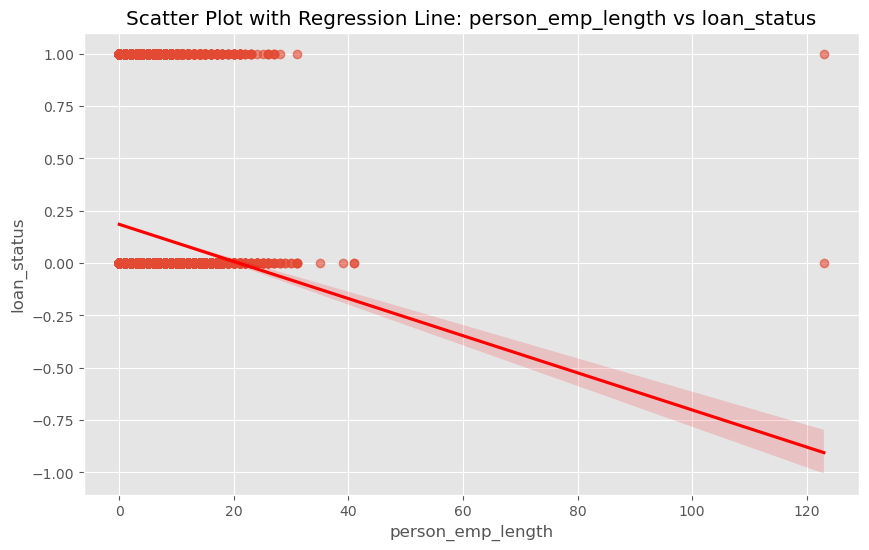

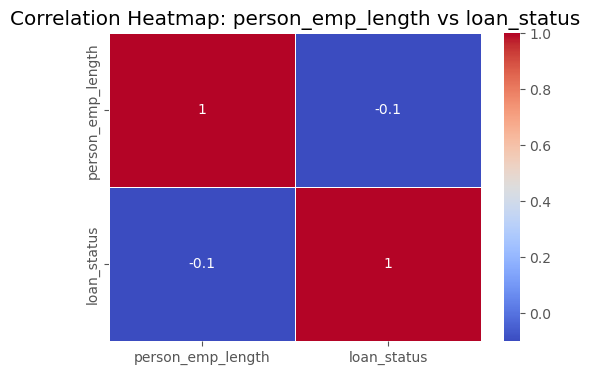





****************************************************************************************************
		loan_amnt
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


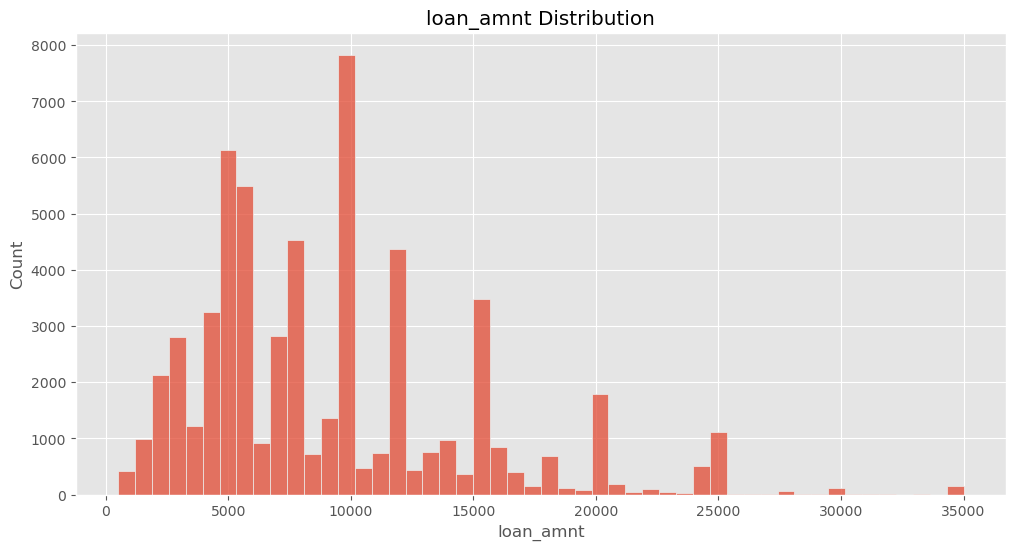

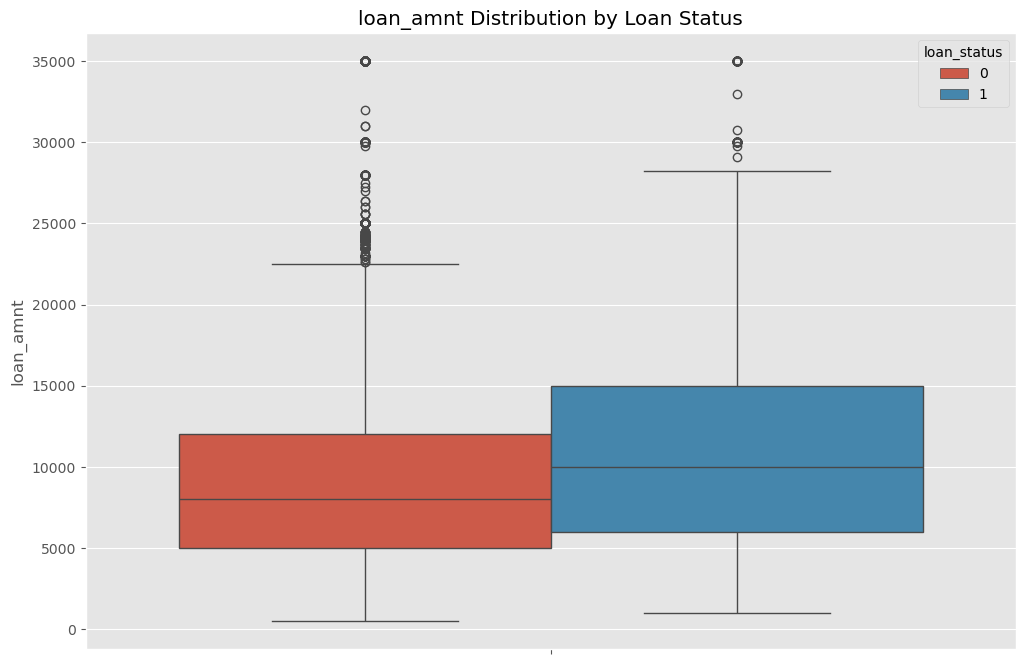

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean      9217.556518
std       5563.807384
min        500.000000
10%       3000.000000
25%       5000.000000
50%       8000.000000
75%      12000.000000
90%      16000.000000
95%      20000.000000
99%      25000.000000
100%     35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


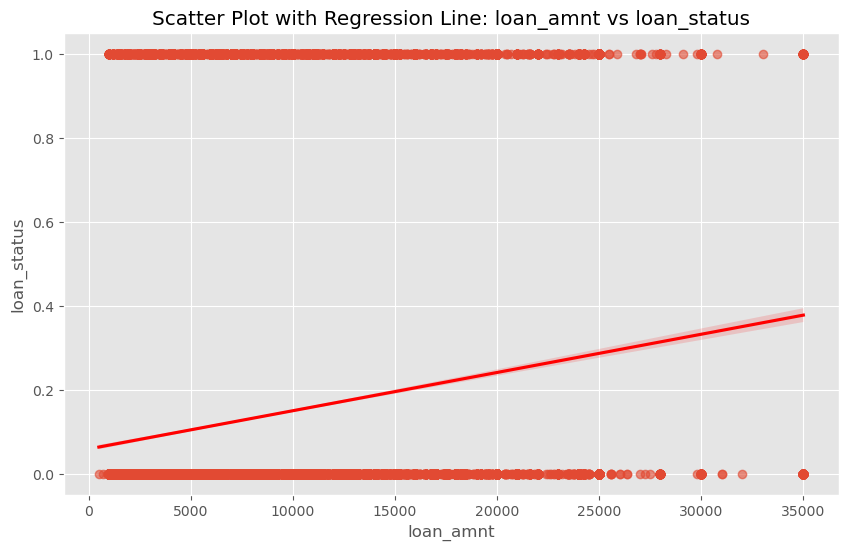

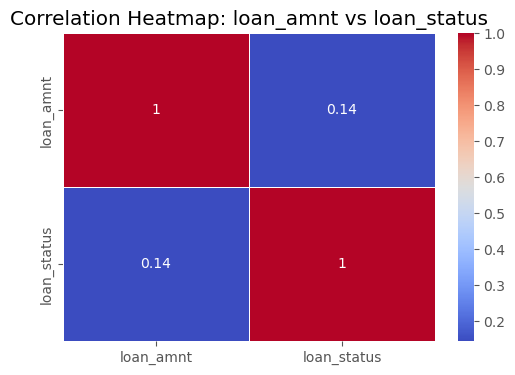





****************************************************************************************************
		loan_int_rate
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


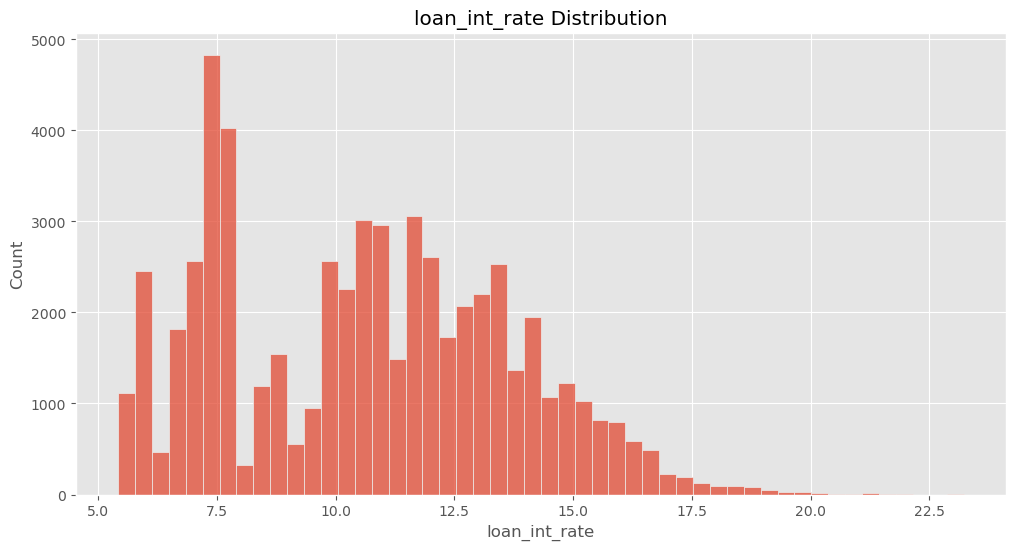

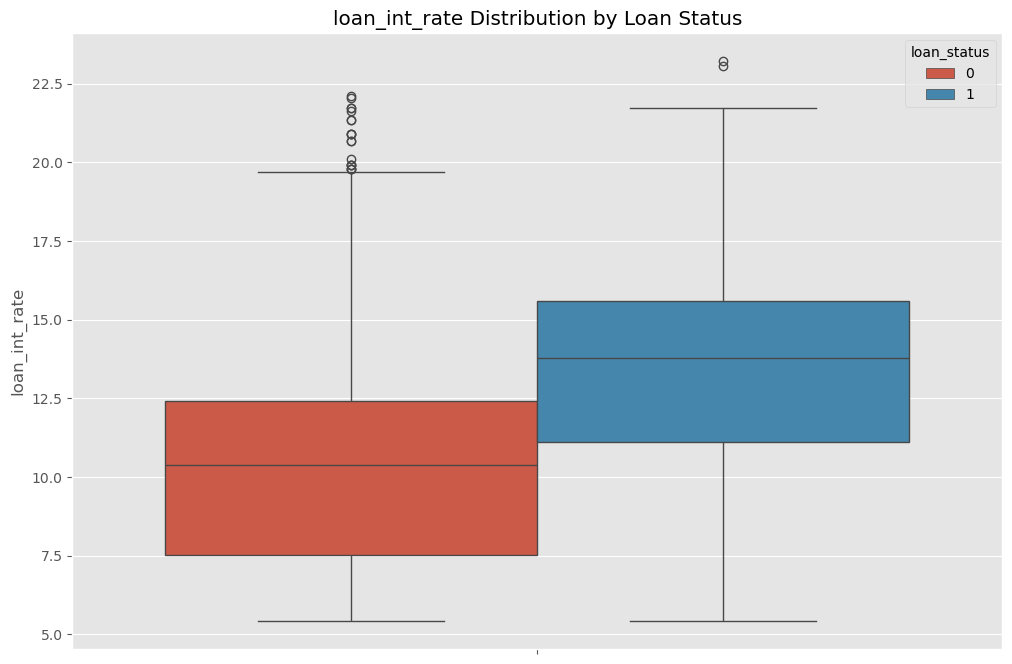

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean        10.677874
std          3.034697
min          5.420000
10%          6.760000
25%          7.880000
50%         10.750000
75%         12.990000
90%         14.720000
95%         15.700000
99%         17.490000
100%        23.220000
max         23.220000
Name: loan_int_rate, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


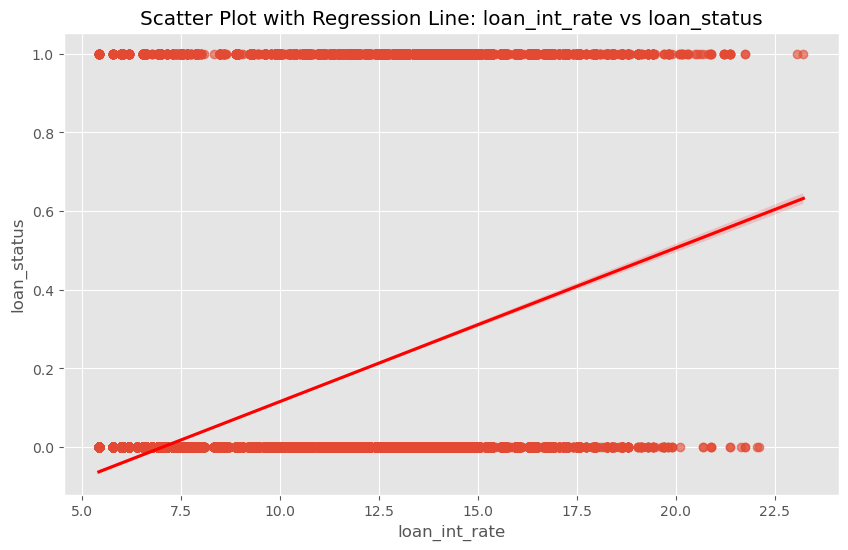

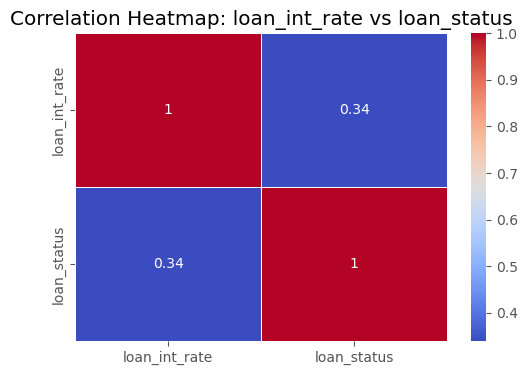





****************************************************************************************************
		loan_percent_income
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


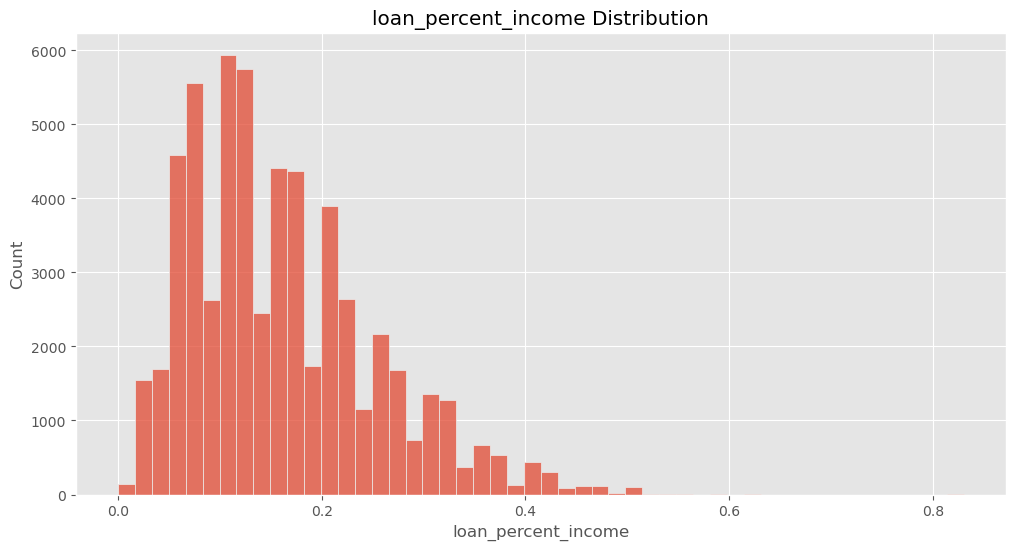

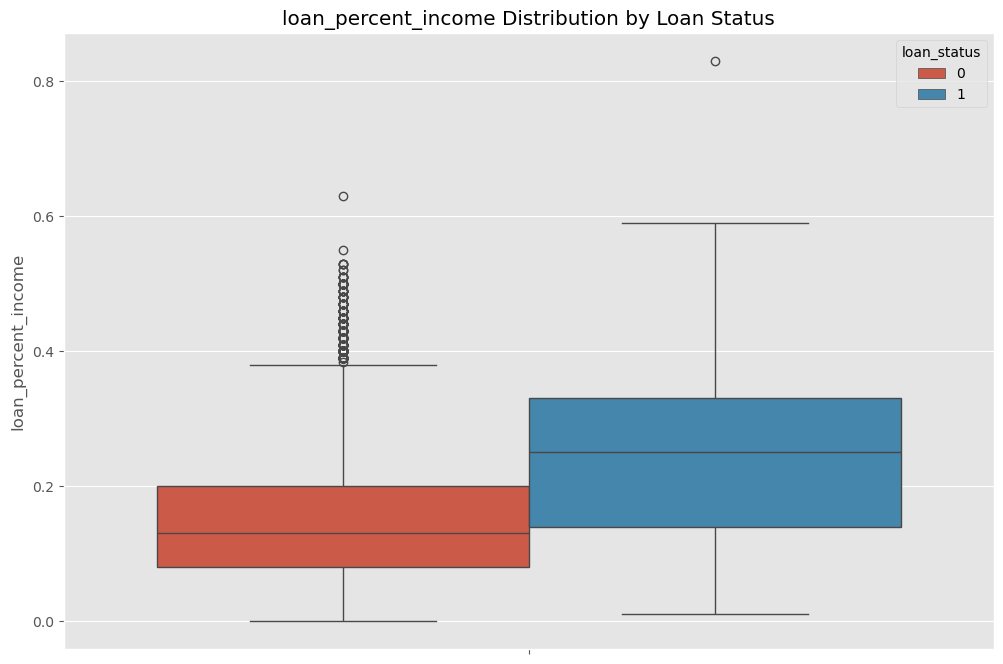

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean         0.159238
std          0.091692
min          0.000000
10%          0.060000
25%          0.090000
50%          0.140000
75%          0.210000
90%          0.290000
95%          0.330000
99%          0.420000
100%         0.830000
max          0.830000
Name: loan_percent_income, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


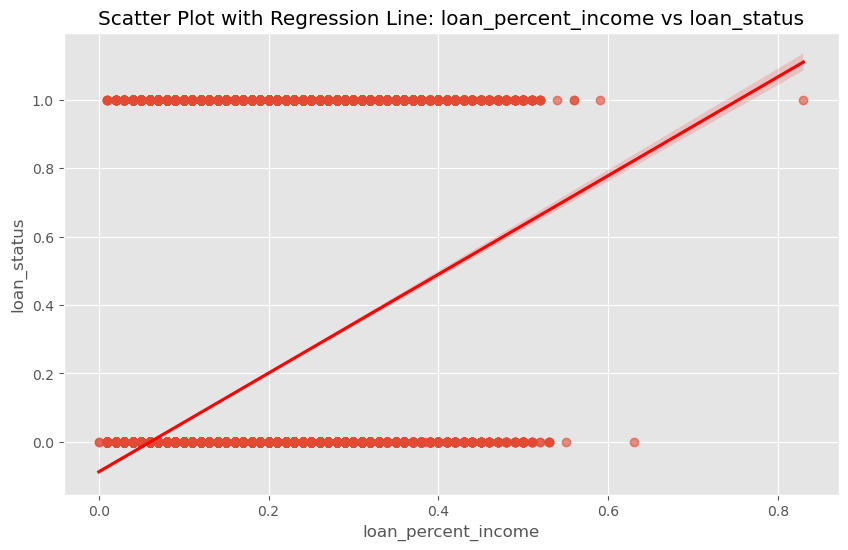

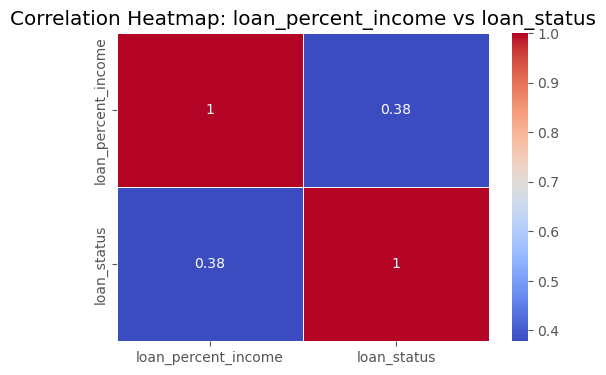





****************************************************************************************************
		cb_person_cred_hist_length
****************************************************************************************************
-------------------------------------------------- 
Histogram & Boxplot --------------------------------------------------


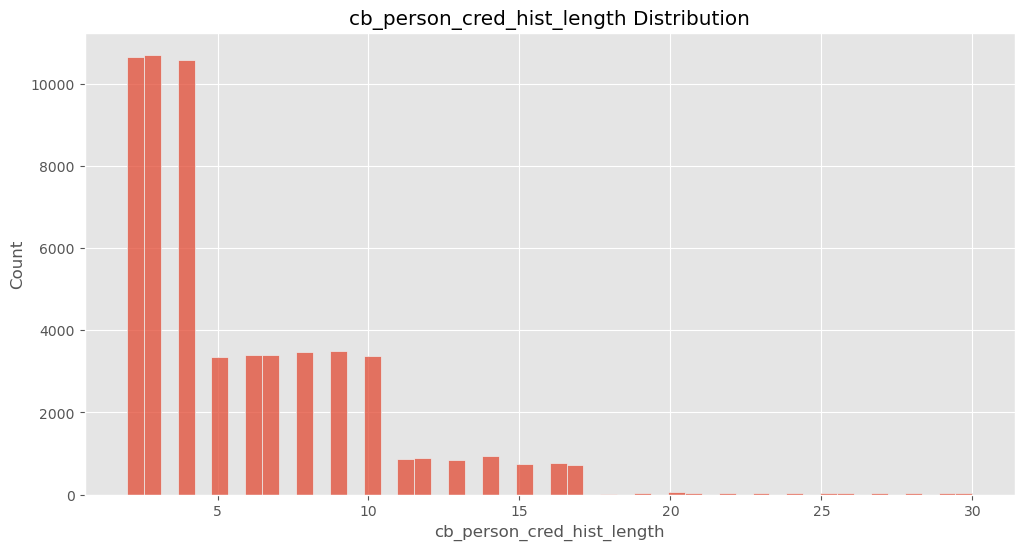

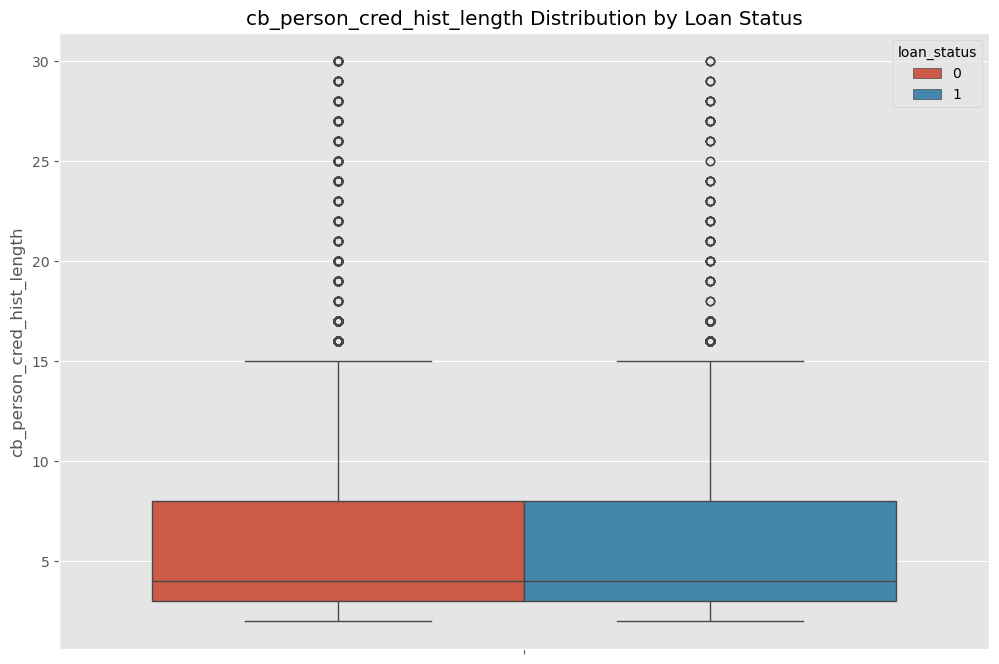

-------------------------------------------------- 
Extremes --------------------------------------------------
count    58645.000000
mean         5.813556
std          4.029196
min          2.000000
10%          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
90%         11.000000
95%         14.000000
99%         17.000000
100%        30.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64
-------------------------------------------------- 
Relationship with Loan Status --------------------------------------------------


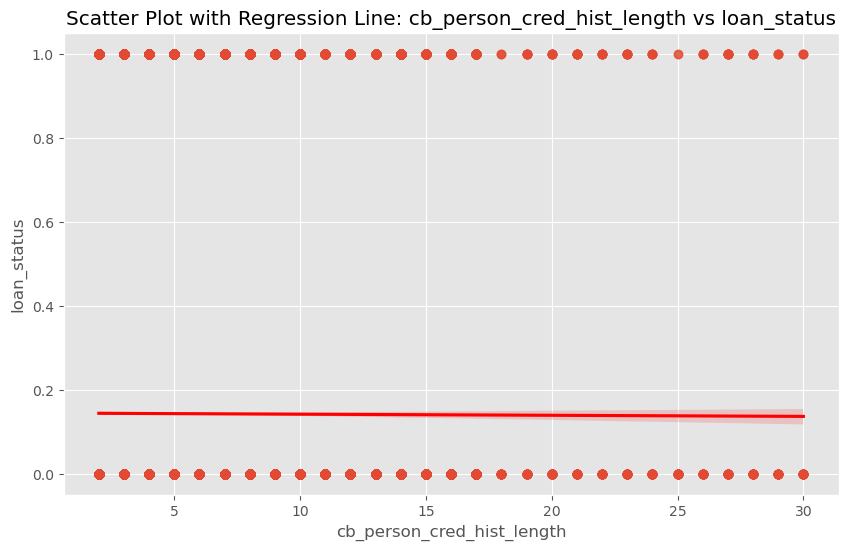

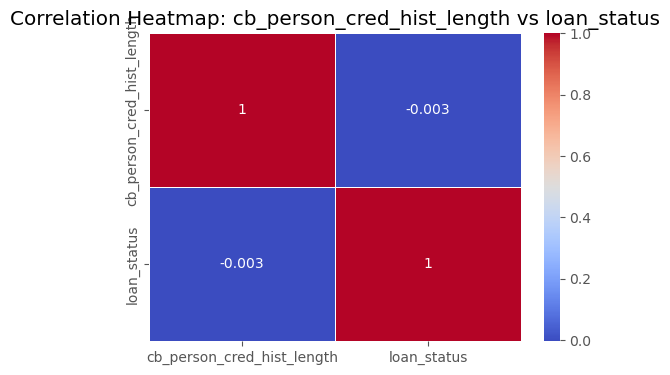

In [109]:
for num in NUM_COLS:
    print("*"*100)
    print(f"\t\t{num}")
    print("*"*100)
    print("-"*50, "\nHistogram & Boxplot", "-"*50)
    plot_hist(df_train, col=num, title=f"{num} Distribution")
    plot_box(df_train, col=num, hue='loan_status', title=f"{num} Distribution by Loan Status")
    print("-"*50, "\nExtremes", "-"*50)
    print(num_stat_summary(df_train, col=num))
    print("-"*50, "\nRelationship with Loan Status", "-"*50)
    plot_numerical_vs_numerical(df_train, num, 'loan_status')
    print("\n\n\n")

### 5.2 Categorical Columns Univariate Analysis

****************************************************************************************************
		person_home_ownership
****************************************************************************************************
Countplot


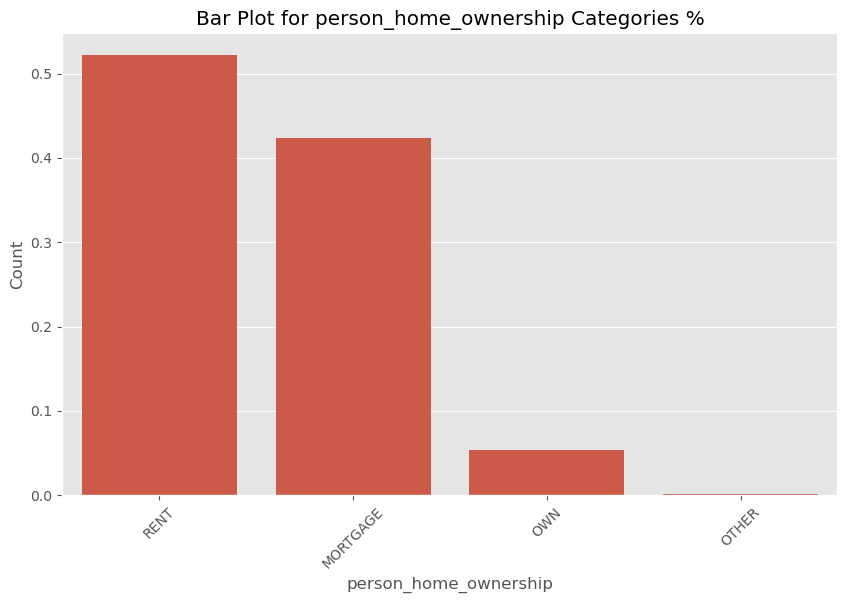

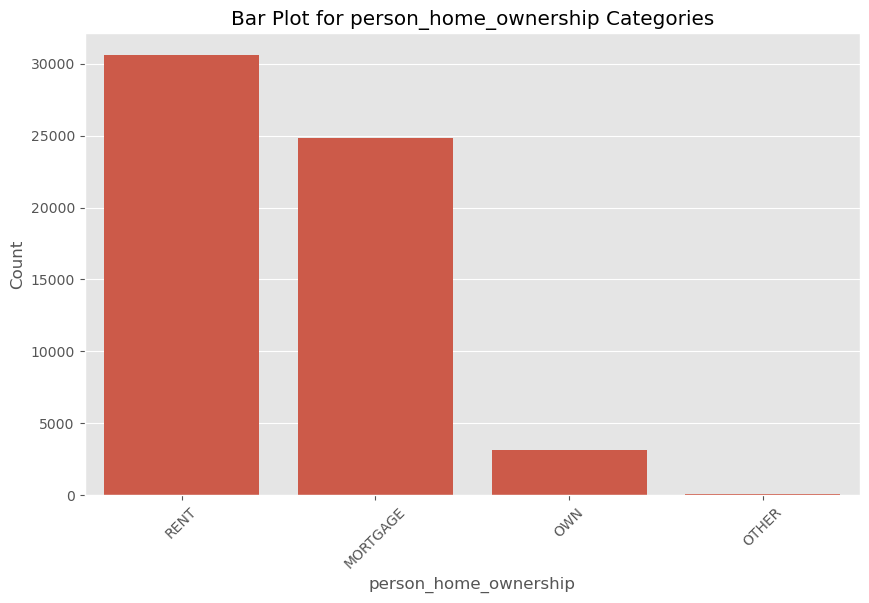

-------------------------------------------------- 
Relationship with target --------------------------------------------------


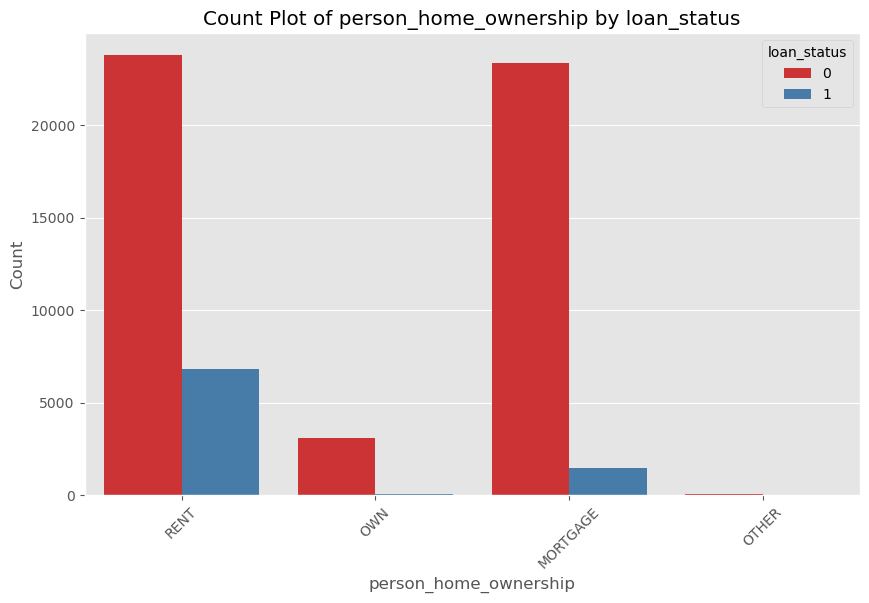

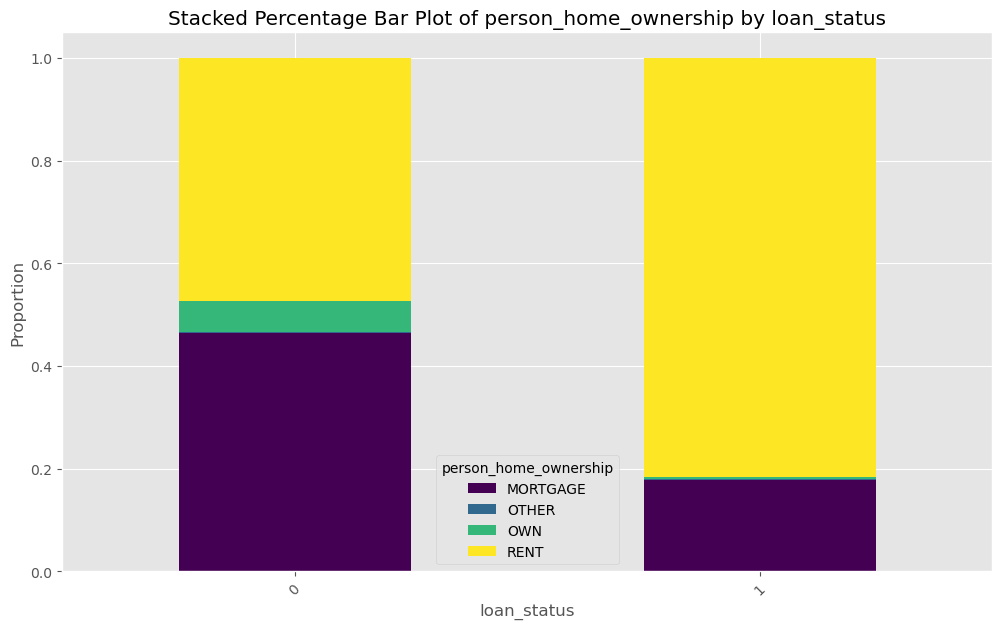





****************************************************************************************************
		loan_intent
****************************************************************************************************
Countplot


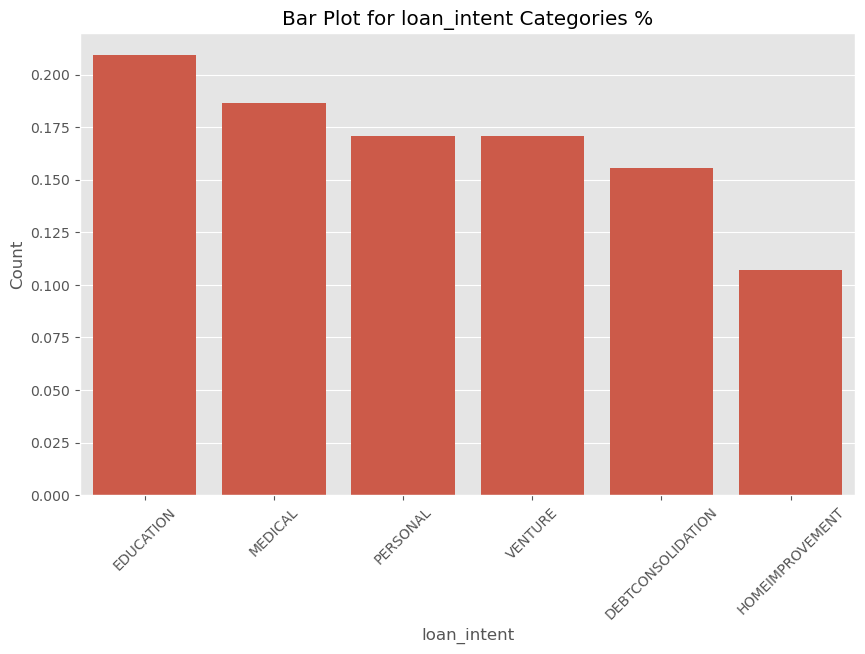

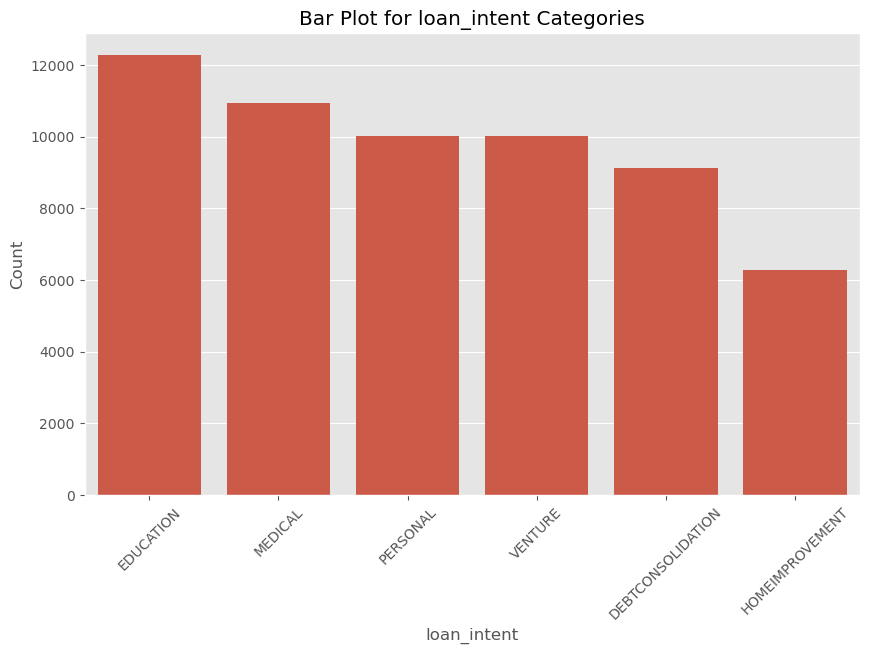

-------------------------------------------------- 
Relationship with target --------------------------------------------------


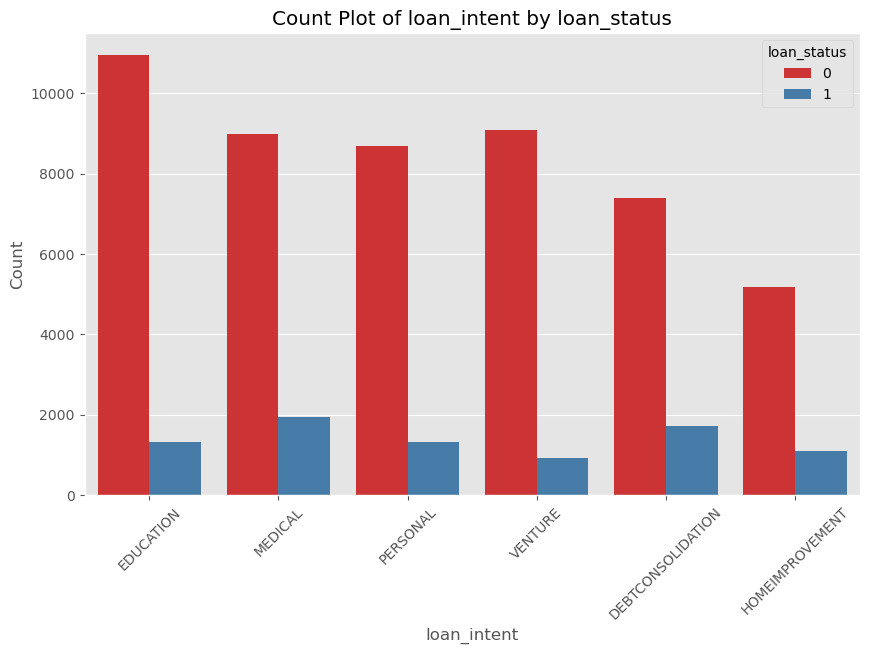

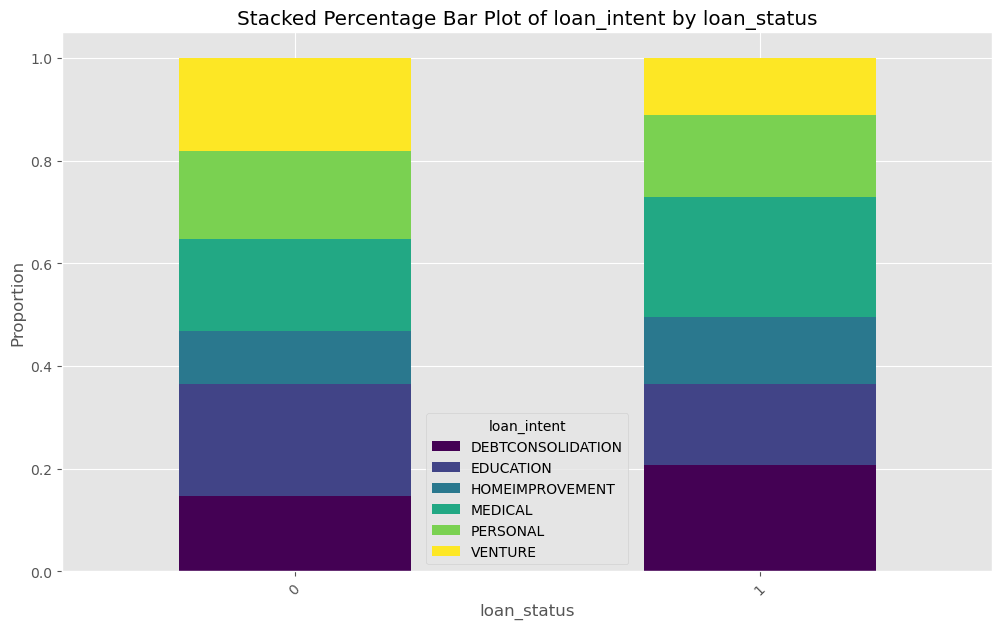





****************************************************************************************************
		loan_grade
****************************************************************************************************
Countplot


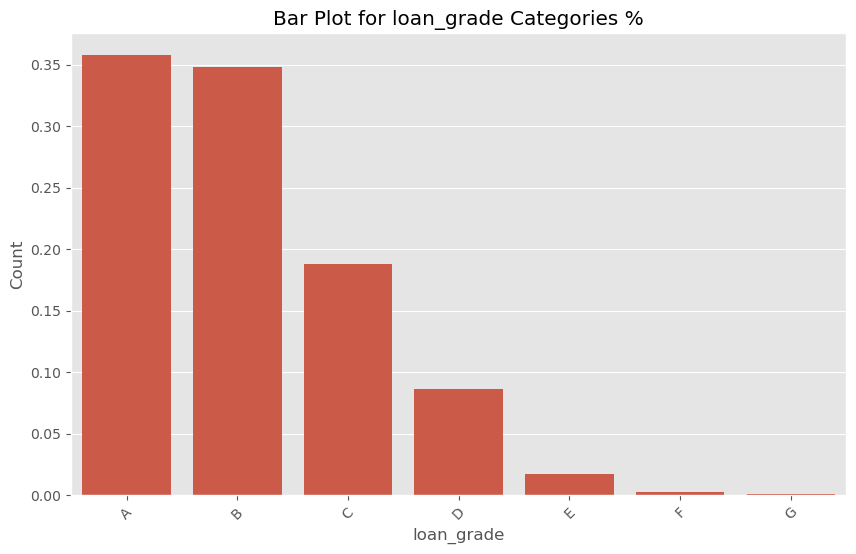

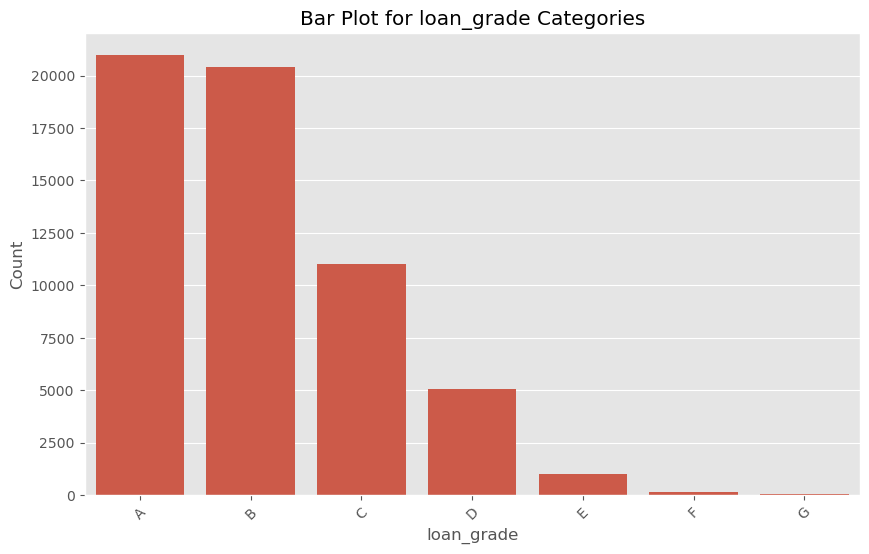

-------------------------------------------------- 
Relationship with target --------------------------------------------------


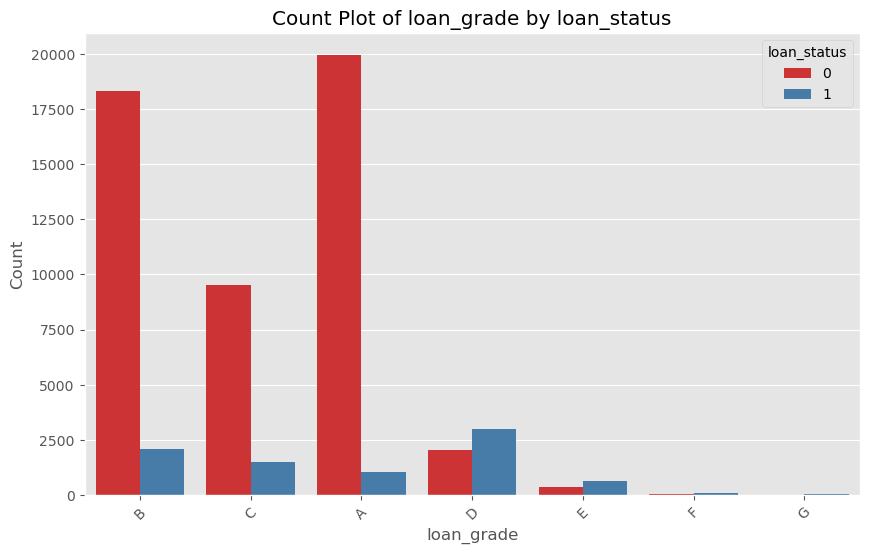

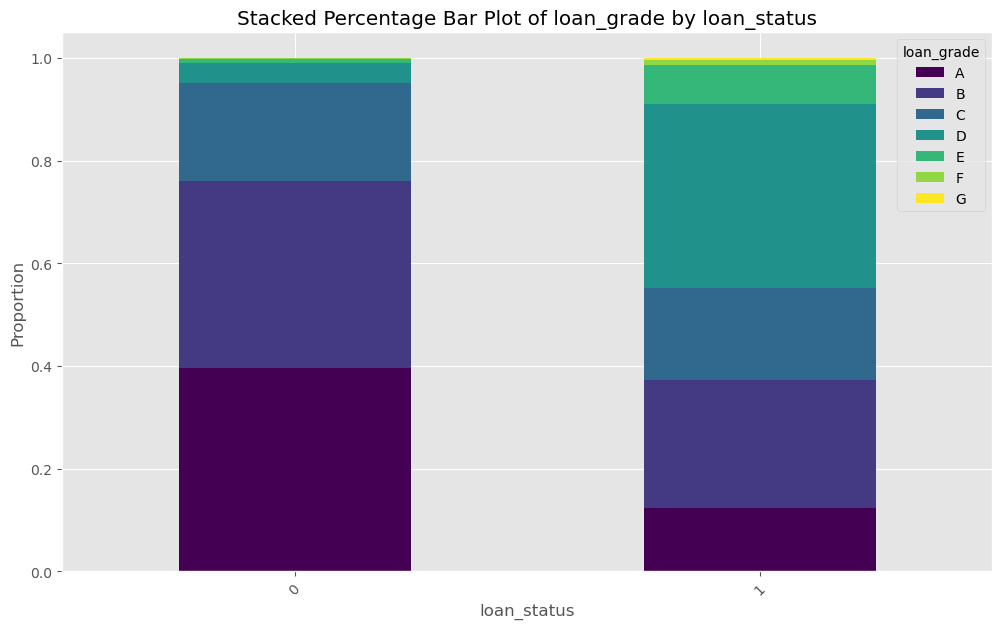





****************************************************************************************************
		cb_person_default_on_file
****************************************************************************************************
Countplot


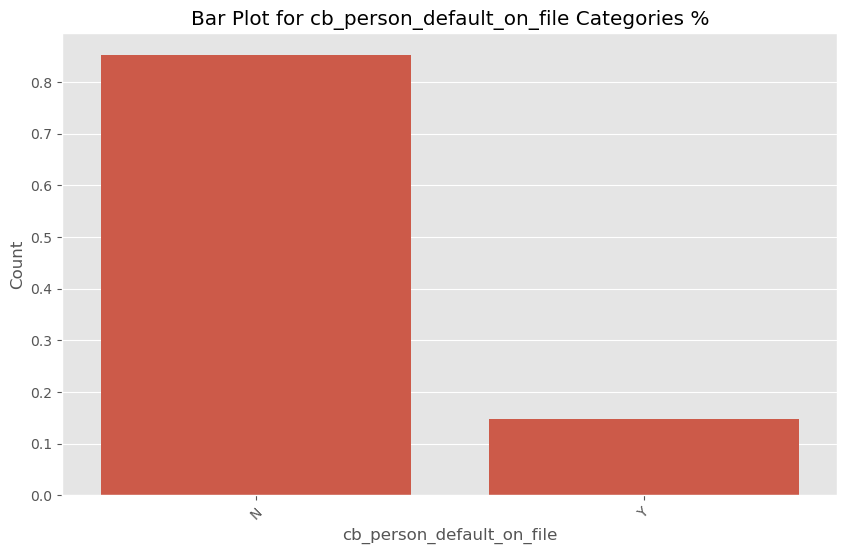

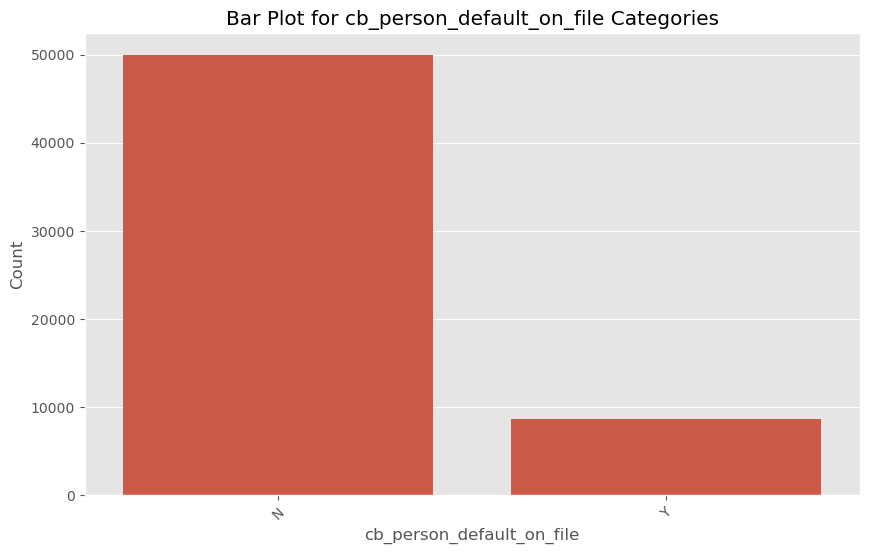

-------------------------------------------------- 
Relationship with target --------------------------------------------------


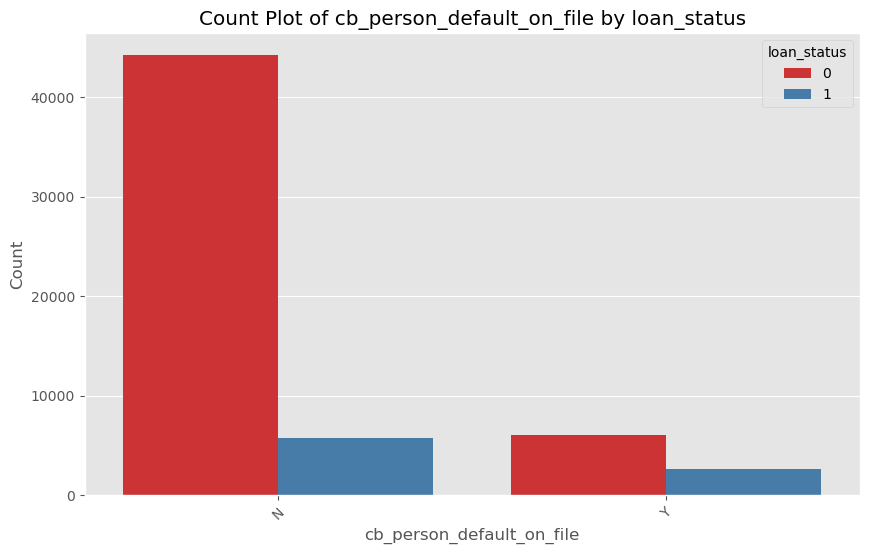

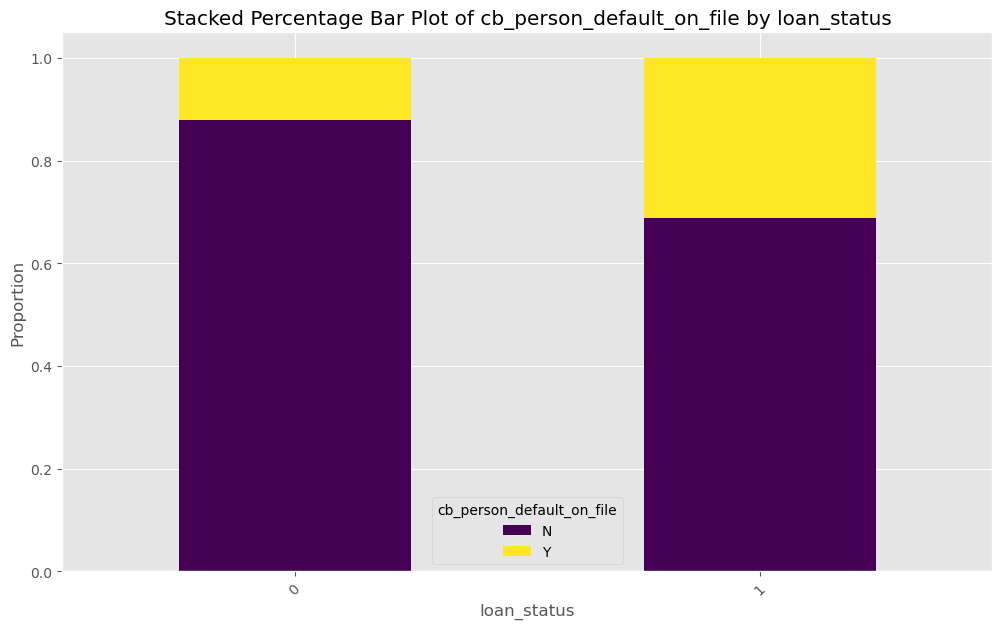





****************************************************************************************************
		loan_status
****************************************************************************************************
Countplot


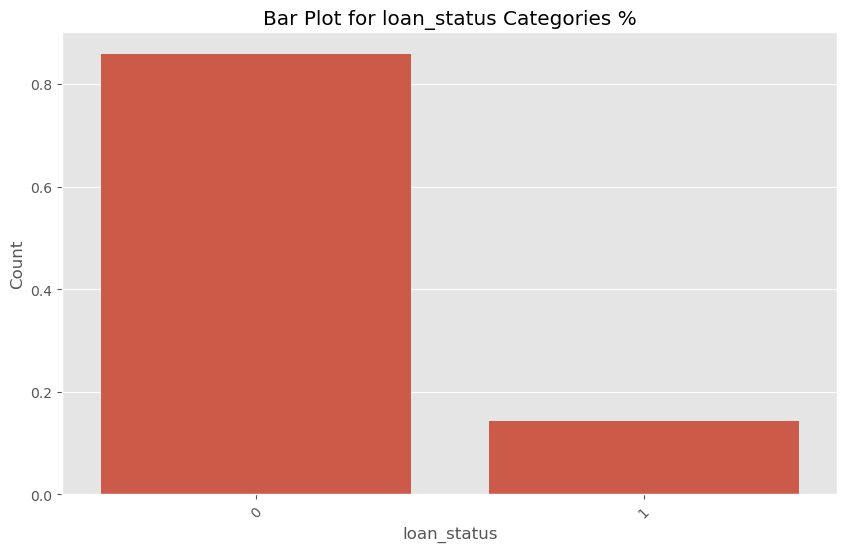

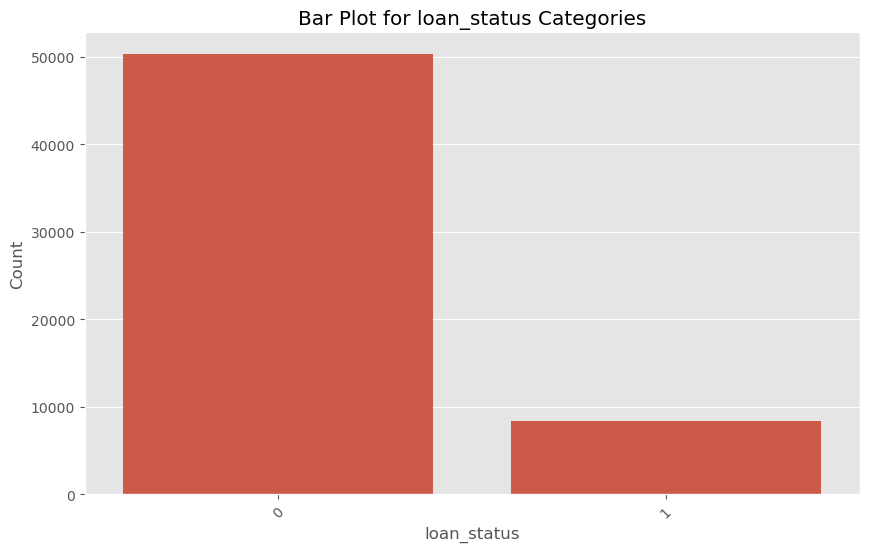

-------------------------------------------------- 
Relationship with target --------------------------------------------------


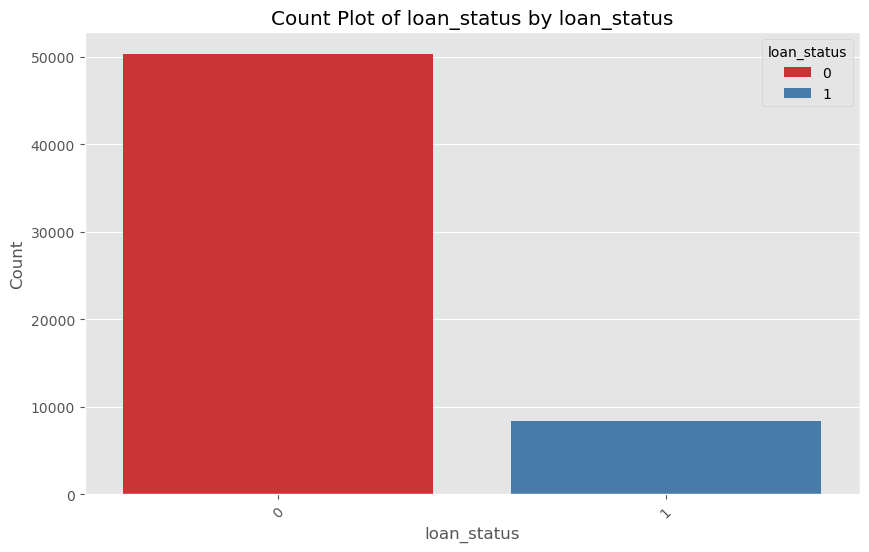

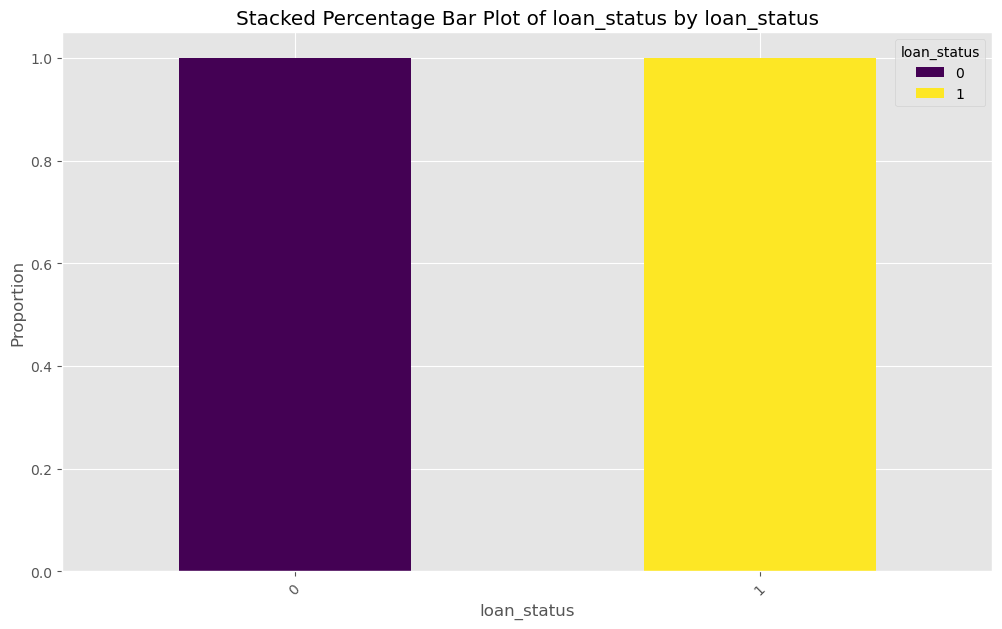

In [114]:
for cat in CAT_COLS:
    print("*"*100)
    print(f"\t\t{cat}")
    print("*"*100)
    print("Countplot")
    plot_categorical_feature(df_train, cat)
    print("-"*50, "\nRelationship with target", "-"*50)
    plot_categorical_feature_with_target(df_train, cat, "loan_status")
    print("\n\n\n")